<a href="https://colab.research.google.com/github/AnnaVashuk/mts/blob/main/%D1%88%D0%B0%D0%B4_%D1%81%D0%BE%D1%80%D0%B5%D0%B2%D0%BD%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import copy
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

In [ ]:
train = pd.read_csv('~/train.csv')
test = pd.read_csv('~/test.csv')

# TRAIN

In [ ]:
train.head()

,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq,binary_target
0,0,Уран,>24LY,14.617797,1.0,27034.974914,71.37,1.000000,NaN,26.0,10.0,NaN,NaN,NaN,False,0.540984,_output-_сеть 500 (условие) 2000f;5d,1.000000,0
1,1,Марс,>24LY,32.686083,3.0,40373.828300,354.27,2.000000,35.679126,45.0,8.0,NaN,NaN,NaN,False,0.573770,тариф_a 250 (условие) _безлим_c_output_сутки,1.414214,0
2,2,Церера,>24LY,25.318570,3.0,32004.378374,139.74,1.414214,NaN,NaN,13.0,NaN,NaN,NaN,False,0.131148,NaN,NaN,0
3,3,Марс,>24LY,70.710678,38.0,59953.505011,1722.65,6.403124,163.309522,203.0,274.0,NaN,NaN,0.031817,False,0.885246,"трафик: 100 (условие) 40mb,_сутки",4.000000,0
4,4,Меркурий,>24LY,9.244999,2.0,21499.998428,28.63,1.414214,5.000000,NaN,NaN,NaN,NaN,NaN,False,0.344262,"трафик: 100 (условие) 40mb,_сутки",1.000000,0


In [ ]:
train.dtypes

client_id               int64
регион                 object
использование          object
сумма                 float64
частота_пополнения    float64
доход                 float64
сегмент_arpu          float64
частота               float64
объем_данных          float64
on_net                float64
продукт_1             float64
продукт_2             float64
зона_1                float64
зона_2                float64
mrg_                     bool
секретный_скор        float64
pack                   object
pack_freq             float64
binary_target           int64
dtype: object

In [ ]:
train.isnull().sum()

client_id                  0
регион                397852
использование              0
сумма                 354894
частота_пополнения    354894
доход                 340461
сегмент_arpu          340461
частота               340461
объем_данных          497362
on_net                368933
продукт_1             419961
продукт_2             605243
зона_1                930441
зона_2                946248
mrg_                       0
секретный_скор             0
pack                  423275
pack_freq             423275
binary_target              0
dtype: int64

In [ ]:
train.describe()

,client_id,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,секретный_скор,pack_freq,binary_target
count,1.010248e+06,655354.000000,655354.000000,669787.000000,669787.000000,669787.000000,512886.000000,641315.000000,590287.000000,405005.000000,79807.000000,64000.000000,1.010248e+06,586973.000000,1.010248e+06
mean,5.051235e+05,41.418633,11.500826,42842.276282,782.594890,3.276499,34.336000,277.221033,95.222444,23.115112,0.001691,0.234682,4.433381e-01,2.599410,1.873649e-01
std,2.916336e+05,25.314037,13.247311,14430.607285,1015.343387,1.789887,46.795739,873.132377,202.602980,63.040553,0.008810,0.974284,3.651556e-01,1.577391,3.902044e-01
min,0.000000e+00,2.924038,1.000000,5726.010183,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00
25%,2.525618e+05,20.672445,2.000000,32149.996445,142.310000,1.732051,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,8.196721e-02,1.414214,0.000000e+00
50%,5.051235e+05,35.805726,6.000000,42311.774838,427.350000,3.000000,16.000000,27.000000,29.000000,6.000000,0.000209,0.063633,3.770492e-01,2.236068,0.000000e+00
75%,7.576852e+05,55.853917,16.000000,52934.419983,1047.010000,4.472136,53.656314,156.000000,99.000000,20.000000,0.000626,0.159084,8.196721e-01,3.464102,0.000000e+00
max,1.010247e+06,336.523194,133.000000,129843.989985,37898.720000,9.539392,1304.725642,50809.000000,12040.000000,4174.000000,1.000000,100.000000,1.000000e+00,25.079872,1.000000e+00


In [ ]:
train = train.drop('pack', axis = 1)

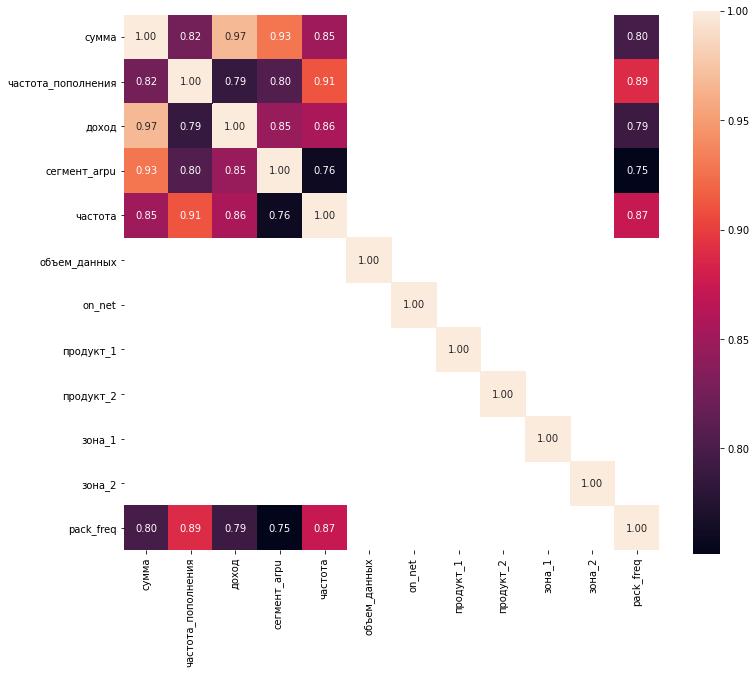

In [ ]:
columns_to_use = ['сумма', 'частота_пополнения', 'доход', 'сегмент_arpu',
                  'частота', 'объем_данных', 'on_net', 'продукт_1', 'продукт_2',
                  'зона_1', 'зона_2', 'pack_freq']

subset_df = train[columns_to_use]

corr_matrix = subset_df.corr()

high_corr_matrix = corr_matrix[corr_matrix.abs() > 0.7]

plt.subplots(figsize=(12, 10))
sns.heatmap(high_corr_matrix, fmt='.2f', square=True, annot=True)
plt.show()

In [ ]:
unique_region = train['регион'].unique()
unique_use = train['использование'].unique()

print(unique_region)
print(unique_use)

['Уран' 'Марс' 'Церера' 'Меркурий' 'Нептун' 'Венера' 'Хаумеа' nan 'Земля'
 'Сатурн' 'Юпитер' 'Эрида' 'Солнце' 'Плутон' 'Макемаке']
['>24LY' '18_21LY' '15_18LY' '9_12LY' '12_15LY' '21_24LY' '3_6LY' '6_9LY']


In [ ]:
data = copy.deepcopy(train)

data_encoded = pd.get_dummies(data, columns=['регион'])

ordinal_mapping = {'>24LY': 8, '18_21LY': 7, '15_18LY': 6, '9_12LY': 5, '12_15LY': 4, '21_24LY': 3, '3_6LY': 2, '6_9LY': 1}
data_encoded['использование_encoded'] = data_encoded['использование'].map(ordinal_mapping)
data_encoded.drop('использование', axis=1, inplace=True)

data_encoded['mrg_'] = data_encoded['mrg_'].map({True: 1, False: 0})

data_encoded.fillna(data_encoded.mean(), inplace=True)
data_encoded.fillna(data_encoded.mode().iloc[0], inplace=True)

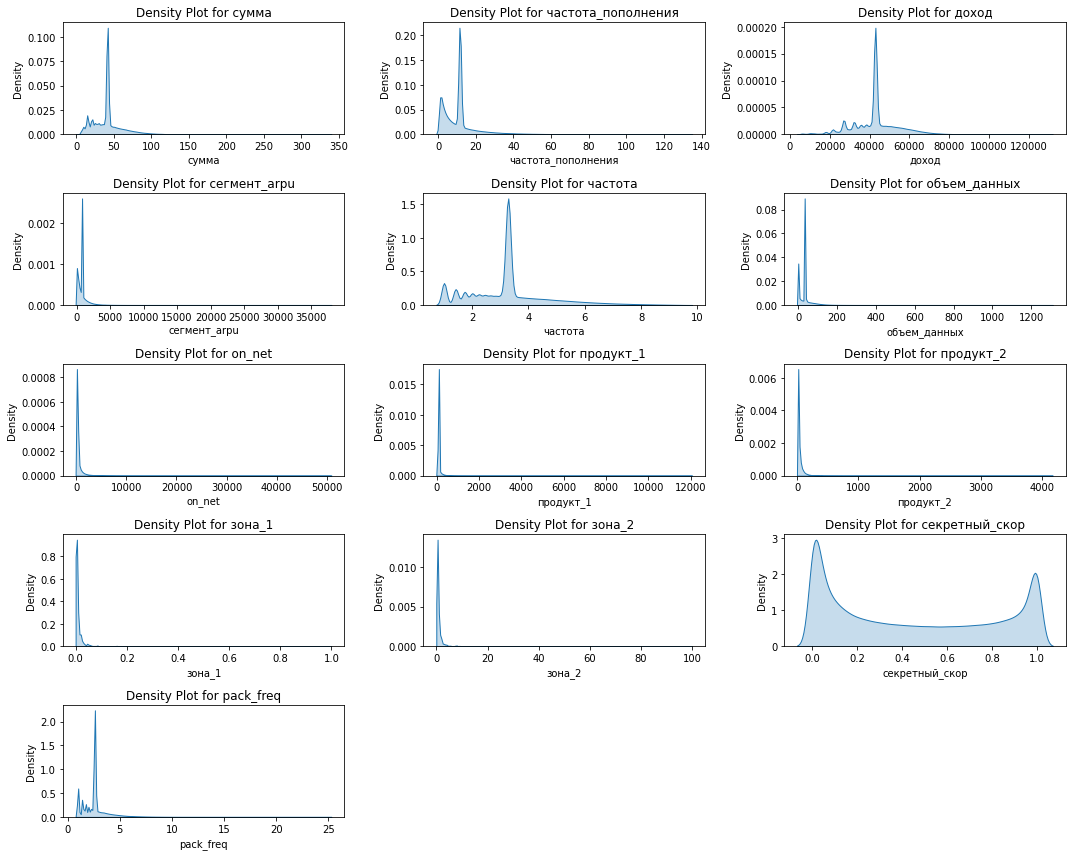

In [ ]:
columns = ['сумма', 'частота_пополнения', 'доход', 'сегмент_arpu', 'частота', 'объем_данных', 'on_net', 'продукт_1', 'продукт_2', 'зона_1', 'зона_2', 'секретный_скор', 'pack_freq']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]
    sns.kdeplot(data_encoded[column], shade=True, ax=ax)
    ax.set_title(f"Density Plot for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Density")

for i in range(len(columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# TEST

In [ ]:
test.head()

,client_id,регион,использование,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,mrg_,секретный_скор,pack,pack_freq
0,1010248,Нептун,>24LY,9.244999,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.081967,NaN,NaN
1,1010249,Земля,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.262295,NaN,NaN
2,1010250,Марс,>24LY,18.489997,3.0,30424.692691,114.10,1.732051,1.000000,22.0,13.0,NaN,0.000835,NaN,False,0.934426,_output-_сеть 500 (условие) 2000f;5d,1.000000
3,1010251,NaN,>24LY,39.223207,7.0,44284.990356,512.82,2.645751,7.615773,130.0,123.0,5.0,NaN,NaN,False,0.508197,_output-_сеть 500 (условие) 2000f;5d,2.236068
4,1010252,Сатурн,>24LY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.163934,NaN,NaN


In [ ]:
test.dtypes

client_id               int64
регион                 object
использование          object
сумма                 float64
частота_пополнения    float64
доход                 float64
сегмент_arpu          float64
частота               float64
объем_данных          float64
on_net                float64
продукт_1             float64
продукт_2             float64
зона_1                float64
зона_2                float64
mrg_                     bool
секретный_скор        float64
pack                   object
pack_freq             float64
dtype: object

In [ ]:
test.isnull().sum()

client_id                  0
регион                196239
использование              0
сумма                 174620
частота_пополнения    174620
доход                 167660
сегмент_arpu          167660
частота               167660
объем_данных          244444
on_net                181709
продукт_1             206602
продукт_2             297807
зона_1                458407
зона_2                466081
mrg_                       0
секретный_скор             0
pack                  208548
pack_freq             208548
dtype: int64

In [ ]:
test.describe()

,client_id,сумма,частота_пополнения,доход,сегмент_arpu,частота,объем_данных,on_net,продукт_1,продукт_2,зона_1,зона_2,секретный_скор,pack_freq
count,4.975860e+05,322966.000000,322966.000000,329926.000000,329926.000000,329926.000000,253142.000000,315877.000000,290984.000000,199779.000000,39179.000000,31505.000000,497586.000000,289038.000000
mean,1.259040e+06,41.537091,11.563220,42902.532781,786.935275,3.287101,34.252289,279.584326,95.533311,23.208671,0.001685,0.243311,0.443364,2.607190
std,1.436408e+05,25.413546,13.306117,14450.444647,1022.534134,1.794584,46.398571,877.004945,204.791120,64.442046,0.007836,1.114792,0.365468,1.582629
min,1.010248e+06,2.066398,1.000000,5726.010183,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.134644e+06,20.672445,2.000000,32149.996445,142.310000,1.732051,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,0.081967,1.414214
50%,1.259040e+06,35.805726,7.000000,42311.774838,427.350000,3.000000,16.000000,27.000000,29.000000,6.000000,0.000209,0.063633,0.377049,2.236068
75%,1.383437e+06,56.235131,16.000000,53025.998986,1054.270000,4.472136,53.646994,157.000000,99.000000,20.000000,0.000835,0.159084,0.819672,3.464102
max,1.507833e+06,352.342589,118.000000,127065.876826,34758.120000,9.539392,1350.505831,27846.000000,7660.000000,3706.000000,0.414441,63.888005,1.000000,24.979992


In [ ]:
data_test = copy.deepcopy(test)

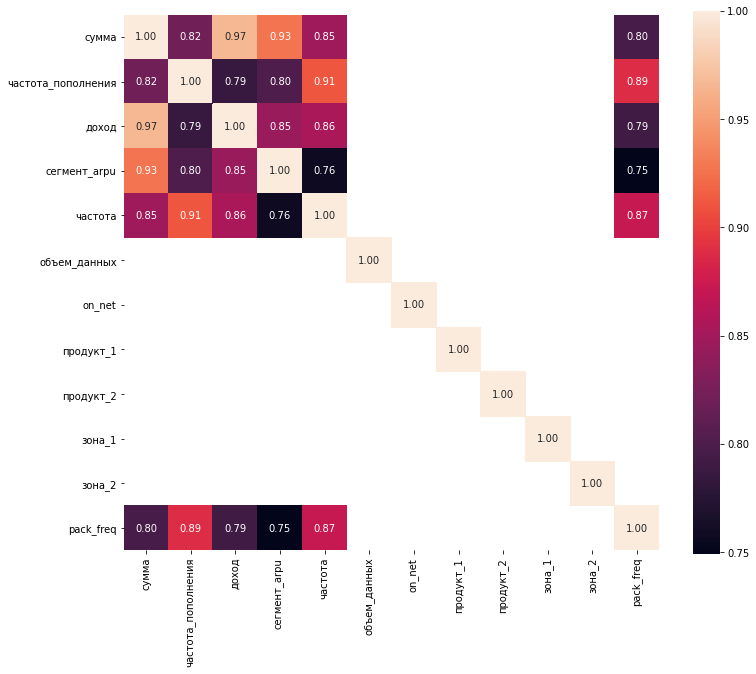

In [ ]:
subset_df = test[columns_to_use]

corr_matrix = subset_df.corr()

high_corr_matrix = corr_matrix[corr_matrix.abs() > 0.7]

plt.subplots(figsize=(12, 10))
sns.heatmap(high_corr_matrix, fmt='.2f', square=True, annot=True)
plt.show()

In [ ]:
data_encoded_test = pd.get_dummies(data_test, columns=['регион'])
data_encoded_test['использование_encoded'] = data_encoded_test['использование'].map(ordinal_mapping)
data_encoded_test.drop('использование', axis=1, inplace=True)

data_encoded_test['mrg_'] = data_encoded_test['mrg_'].map({True: 1, False: 0})

data_encoded_test.fillna(data_encoded_test.mean(), inplace=True)
data_encoded_test.fillna(data_encoded_test.mode().iloc[0], inplace=True)

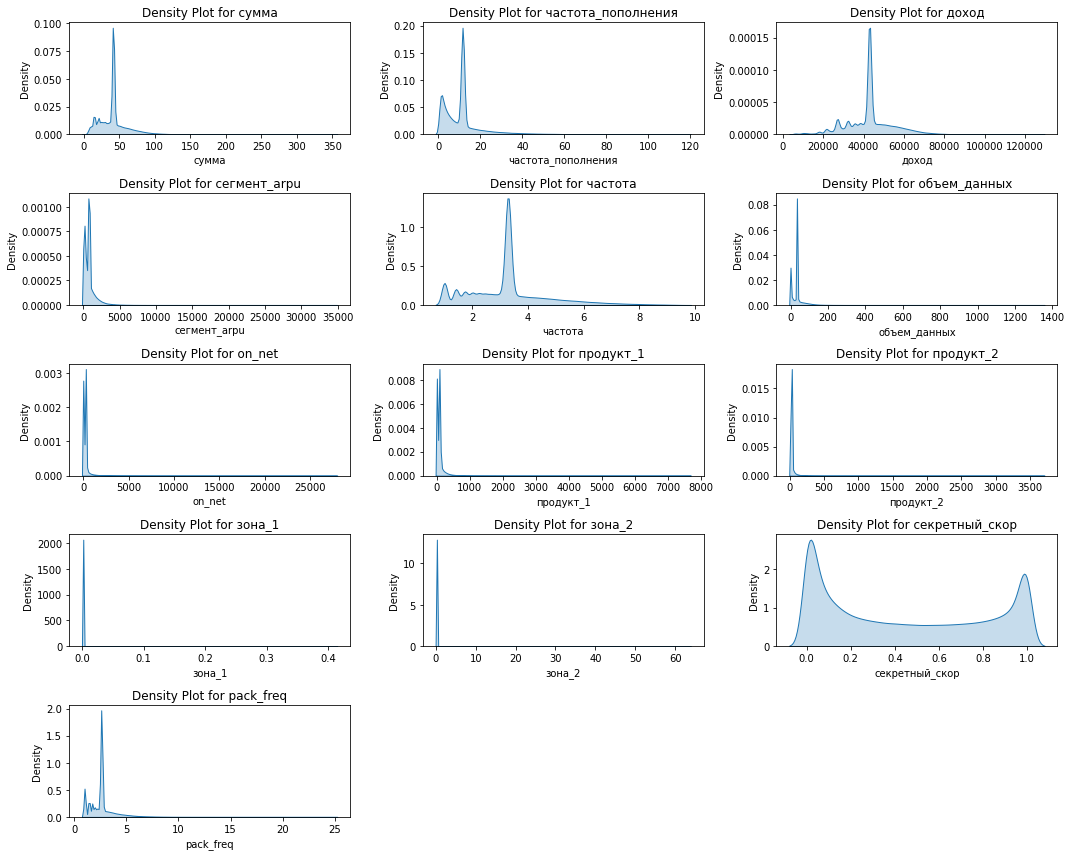

In [ ]:
columns_1 = ['сумма', 'частота_пополнения', 'доход', 'сегмент_arpu', 'частота', 'объем_данных', 'on_net', 'продукт_1', 'продукт_2', 'зона_1', 'зона_2', 'секретный_скор', 'pack_freq']

num_cols = 3
num_rows = (len(columns_1) - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

for i, column in enumerate(columns_1):
    ax = axes[i // num_cols, i % num_cols]
    sns.kdeplot(data_encoded_test[column], shade=True, ax=ax)
    ax.set_title(f"Density Plot for {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Density")

for i in range(len(columns_1), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# RandomForest

In [ ]:
X_train = data_encoded.drop(['binary_target'], axis=1)
y_train = data_encoded['binary_target']
X_test = data_encoded_test

In [ ]:
numeric_features = ['доход', 'сегмент_arpu', 'частота', 'объем_данных', 'on_net', 'продукт_1', 'продукт_2', 'секретный_скор', 'pack_freq']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ]
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier())])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['доход', 'сегмент_arpu',
                                                   'частота', 'объем_данных',
                                                   'on_net', 'продукт_1',
                                                   'продукт_2',
                                                   'секретный_скор',
                                                   'pack_freq'])])),
                ('classifier', RandomForestClassifier())])

In [ ]:
preds = pipeline.predict(X_test)

f1_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1')
print("F1:", f1_scores.mean())

F1: 0.6049581162672906


In [ ]:
y_preds = pd.DataFrame({'column_name': preds})
ids = pd.DataFrame(X_test['client_id'])
ids.reset_index(drop=True, inplace=True)
res = pd.DataFrame({'client_id': ids['client_id'], 'preds': y_preds['column_name']})

res.to_csv('competition.csv', index=False)